<a href="https://colab.research.google.com/github/jessiepedi/IS_4487_Tokyo/blob/main/Lab_3_JessiePerezDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [2]:
import pandas as pd



# Load Data

In [3]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [4]:
print(ss.head())


   order_id  order_date order_year_month  customer_name               city  \
0     51188  2021-07-01          2021-07  Audrey Blanco  North Cherylmouth   
1     51187  2021-07-01          2021-07    Isaac Allen         Traceyland   
2     51199  2021-07-02          2021-07     Ian Morgan          Dylanberg   
3     51241  2021-07-04          2021-07     Alexa Bell     Lake Tracytown   
4     51297  2021-07-08          2021-07     Casey Diaz        Byrdchester   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
1  WEST VIRGINIA                   4.0   
2  SOUTH DAKOTA                    5.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   

                                        product_name product_line  \
0  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
1  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
2  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
3 

In [5]:
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [6]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [7]:
ss_cleaned = ss.dropna()
print("Original DataFrame shape:", ss.shape)
print("Cleaned DataFrame shape:", ss_cleaned.shape)
ss_cleaned.info()

Original DataFrame shape: (56045, 10)
Cleaned DataFrame shape: (55500, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          55500 non-null  int64  
 1   order_date        55500 non-null  object 
 2   order_year_month  55500 non-null  object 
 3   customer_name     55500 non-null  object 
 4   city              55500 non-null  object 
 5   state_province    55500 non-null  object 
 6   quantity          55500 non-null  float64
 7   product_name      55500 non-null  object 
 8   product_line      55500 non-null  object 
 9   product_price     55500 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [30]:
ss_cleaned.describe()
ss_clean = ss_cleaned[(ss_cleaned['quantity'] < 2500) & (ss_cleaned['product_price'] < 4000) &
                      (ss_cleaned['order_year_month'] >= '2019-12-31') & (ss_cleaned['order_year_month'] <= '2022-06-30')]
ss_clean.describe()

,order_id,quantity,product_price
count,53972.000000,53972.000000,53972.000000
mean,61616.123953,1.553046,614.499495
std,7501.246519,9.302121,817.091055
min,45079.000000,1.000000,2.290000
25%,55624.000000,1.000000,7.950000
50%,61840.000000,1.000000,475.600000
75%,68020.000000,2.000000,914.620000
max,74146.000000,2000.000000,3578.270000


I coded that products_price that equaled more than 4000 to be nixed from the dataset because I found it unreasonable for a singular item to be more than that price. Especially, when the products don't involve things such as machines.


In [31]:
ss_clean['total_purchase'] = ss_clean['quantity'] * ss_clean['product_price']
print(ss_clean[['quantity', 'product_price', 'total_purchase']].head())

   quantity  product_price  total_purchase
0       3.0         649.99         1949.97
1       4.0         649.99         2599.96
2       5.0         649.99         3249.95
3       1.0         649.99          649.99
4       1.0         649.99          649.99


<ipython-input-31-45a71d365e11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_clean['total_purchase'] = ss_clean['quantity'] * ss_clean['product_price']


Check that your cleaning worked

In [32]:
ss_clean.info()
ss_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 53972 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          53972 non-null  int64  
 1   order_date        53972 non-null  object 
 2   order_year_month  53972 non-null  object 
 3   customer_name     53972 non-null  object 
 4   city              53972 non-null  object 
 5   state_province    53972 non-null  object 
 6   quantity          53972 non-null  float64
 7   product_name      53972 non-null  object 
 8   product_line      53972 non-null  object 
 9   product_price     53972 non-null  float64
 10  total_purchase    53972 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.9+ MB


,order_id,quantity,product_price,total_purchase
count,53972.000000,53972.000000,53972.000000,5.397200e+04
mean,61616.123953,1.553046,614.499495,7.981310e+02
std,7501.246519,9.302121,817.091055,1.415328e+04
min,45079.000000,1.000000,2.290000,2.290000e+00
25%,55624.000000,1.000000,7.950000,1.497000e+01
50%,61840.000000,1.000000,475.600000,4.756000e+02
75%,68020.000000,2.000000,914.620000,1.000440e+03
max,74146.000000,2000.000000,3578.270000,2.024994e+06


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [33]:
avg_price_per_year_month = ss_clean.groupby('order_year_month')['product_price'].mean().reset_index()

avg_price_per_year_month = avg_price_per_year_month.sort_values('order_year_month')

print("Average price per year-month:")
print(avg_price_per_year_month)



Average price per year-month:
   order_year_month  product_price
0           2020-01    3172.420978
1           2020-02    3199.469359
2           2020-03    3242.035279
3           2020-04    3194.646275
4           2020-05    3192.571359
5           2020-06    3132.275911
6           2020-07    1959.974251
7           2020-08    1924.981087
8           2020-09    1764.130833
9           2020-10    1800.830762
10          2020-11    1666.368901
11          2020-12    1729.697795
12          2021-01    1774.621612
13          2021-02    1755.272269
14          2021-03    1760.495962
15          2021-04    1691.161107
16          2021-05    1640.100368
17          2021-06    1694.477581
18          2021-07     729.851550
19          2021-08     409.107649
20          2021-09     437.462140
21          2021-10     434.127245
22          2021-11     468.310875
23          2021-12     500.330821
24          2022-01     469.658801
25          2022-02     481.718170
26          2022-03     4

In [34]:
revenue_per_year_month = ss_clean.groupby('order_year_month')['total_purchase'].sum().reset_index()

revenue_per_year_month = revenue_per_year_month.sort_values('order_year_month')

print("Revenue per year-month:")
print(revenue_per_year_month)

Revenue per year-month:
   order_year_month  total_purchase
0           2020-01      4745149.93
1           2020-02       499117.22
2           2020-03       706668.08
3           2020-04       651707.84
4           2020-05       657669.70
5           2020-06       635852.01
6           2020-07       484113.64
7           2020-08       531294.78
8           2020-09       338713.12
9           2020-10       401585.26
10          2020-11       303279.14
11          2020-12       556962.69
12          2021-01       429458.43
13          2021-02       456370.79
14          2021-03       466531.43
15          2021-04       488745.56
16          2021-05       534672.72
17          2021-06       525288.05
18          2021-07      1072057.49
19          2021-08      1782453.48
20          2021-09      1864925.94
21          2021-10      2012010.82
22          2021-11      2152333.56
23          2021-12      2890764.61
24          2022-01      2398289.17
25          2022-02      2355462.16
26  

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

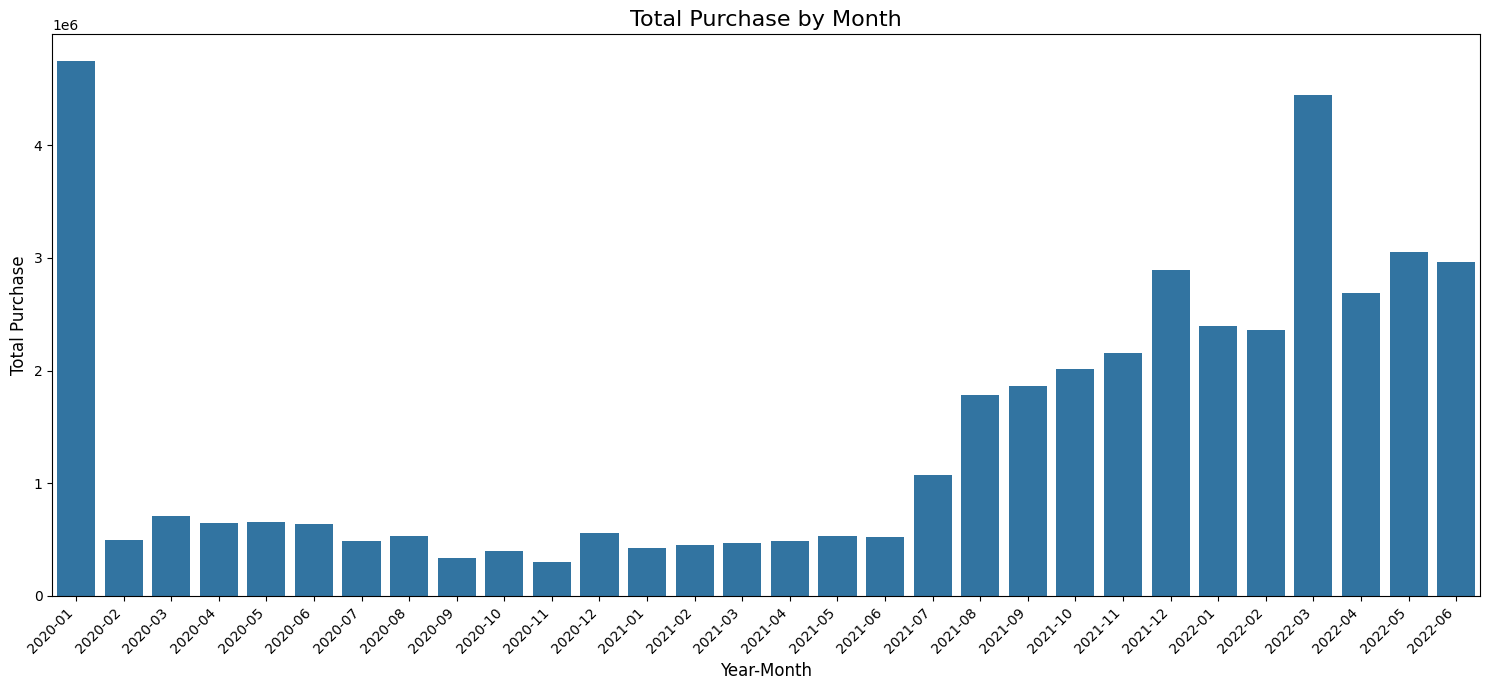

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
monthly_sales = ss_clean.groupby('order_year_month')['total_purchase'].sum().reset_index()

monthly_sales = monthly_sales.sort_values('order_year_month')

plt.figure(figsize=(15, 7))
sns.barplot(x='order_year_month', y='total_purchase', data=monthly_sales)

plt.title('Total Purchase by Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Purchase', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-44-21e3fcde122a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_clean["state_province"] = ss_clean["state_province"].astype("category")


<Axes: xlabel='product_line', ylabel='total_purchase'>

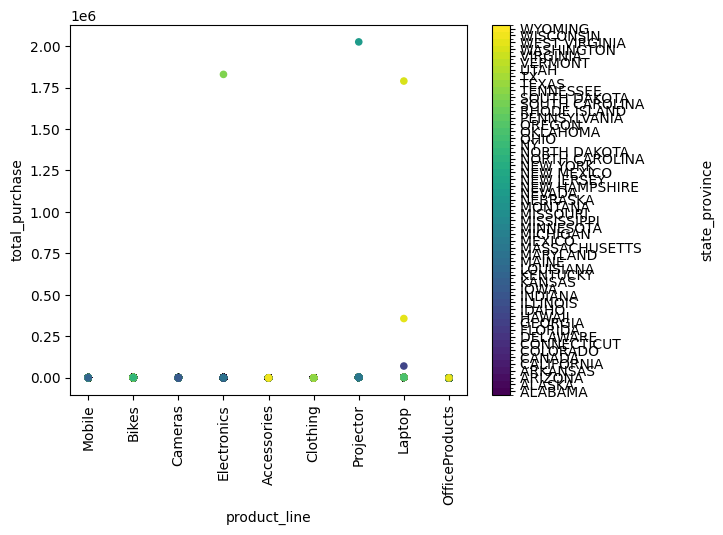

In [44]:
ss_clean["state_province"] = ss_clean["state_province"].astype("category")
ss_clean.plot(kind = "scatter", x = 'product_line',y = 'total_purchase',c = 'state_province', cmap='viridis', rot =90)

Make an interpretive comment.

The first plot (bar graph) describes the growth in total sales accross the years/months. This may be shown to stakeholders to encourage them too keep close ties with the company. Furthermore, The scatter plot shows what states or province have added the most value to the company and who has not. This will affect advertisement efforts and funds.